In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
fhist = r.TFile("./results_histOnly_CrowdedIslands.root")
#fhist = r.TFile("./data/crowded/gm2offline_ana_17366149_15930.00084.root")
fhist.cd("farline")
fhist.ls()

TFile**		./results_histOnly_CrowdedIslands.root	
 TFile*		./results_histOnly_CrowdedIslands.root	
  TDirectoryFile*		farline	farline (ReconComparisonEvWClusterSum) folder
   KEY: TH2D	evwEnergyEvW;1	EnergyEast vs. EnergyWest
   KEY: TH2D	counterHist;1	Number of Clusters Per Island in East and West
   KEY: TH2D	counterHistHighEnergy;1	Number of Clusters Per Island in East and West [All Clusters Above Energy Cutoff]
   KEY: TH2D	evwDeltaXDeltaY;1	Energy Weighted #deltaX vs. #deltaY
   KEY: TH2D	evwDeltaTCalo;1	Energy Weighted #deltaT
   KEY: TH1D	evwDeltaE;1	#deltaE (n:n Islands Only)
   KEY: TH1D	evwDeltaEAll;1	#deltaE (All Islands)
  KEY: TDirectoryFile	farline;1	farline (ReconComparisonEvWClusterSum) folder


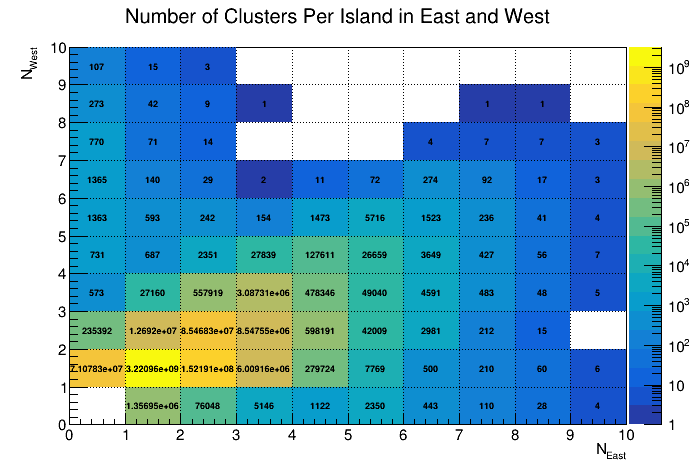

In [3]:
c = r.TCanvas()
counterHist = fhist.Get("farline").Get("counterHist").Clone()
counterHist.Draw("colz text")
counterHist.GetXaxis().SetRangeUser(0,10)
counterHist.GetYaxis().SetRangeUser(0,10)
c.SetLogz()
c.SetGrid()
c.Draw()

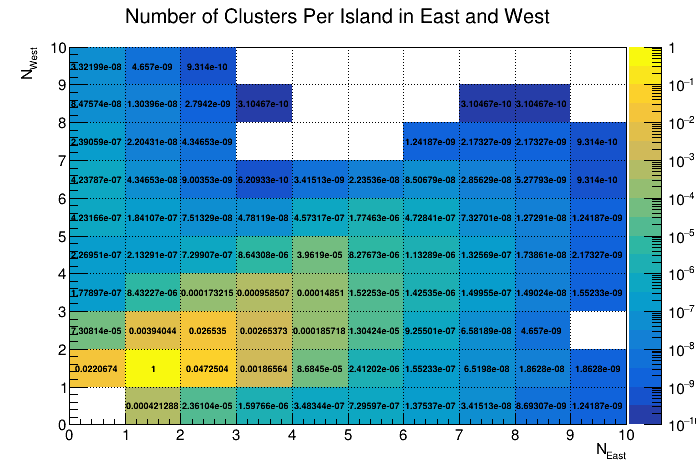

In [7]:
c = r.TCanvas()
counterHistScaled = counterHist.Clone("counterHistScaled")
counterHistScaled.Scale(1/counterHistScaled.GetBinContent(2,2)*1)
counterHistScaled.Draw("colz text")
counterHistScaled.GetXaxis().SetRangeUser(0,10)
counterHistScaled.GetYaxis().SetRangeUser(0,10)
counterHistScaled.GetZaxis().SetRangeUser(0.0000000001,1)
c.SetLogz()
c.SetGrid()
c.Draw()

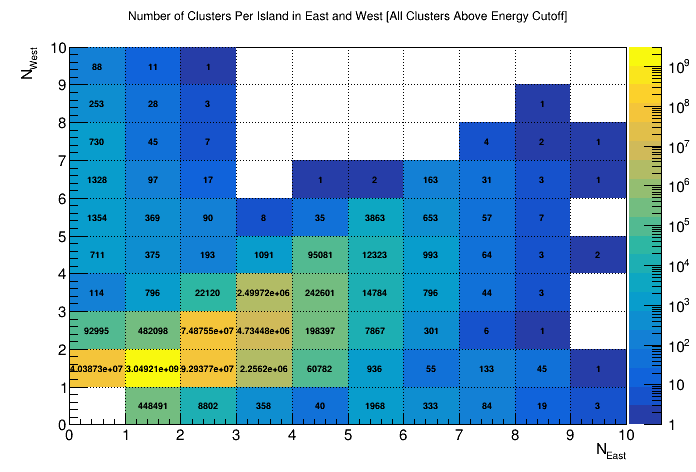

In [8]:
c = r.TCanvas()
counterHistHighEnergy = fhist.Get("farline").Get("counterHistHighEnergy").Clone()
counterHistHighEnergy.Draw("colz text")
counterHistHighEnergy.GetXaxis().SetRangeUser(0,10)
counterHistHighEnergy.GetYaxis().SetRangeUser(0,10)
c.SetLogz()
c.SetGrid()
c.Draw()

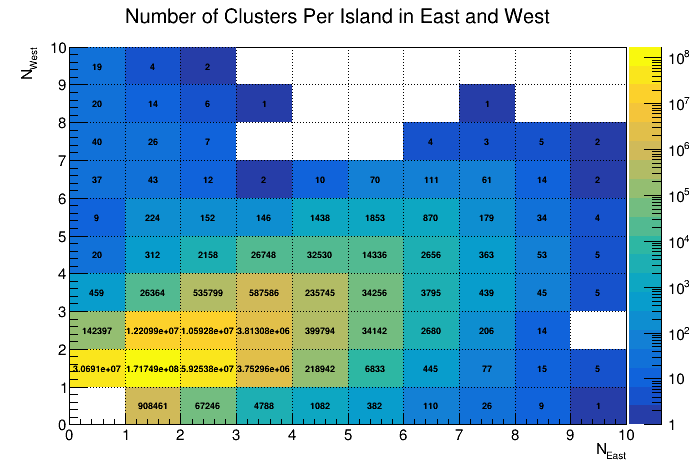

In [9]:
c = r.TCanvas()
counterHistLowEnergy = counterHist.Clone("counterHistLowEnergy")
counterHistLowEnergy.Add(counterHistHighEnergy, -1)
counterHistLowEnergy.Draw("colz text")
counterHistLowEnergy.GetXaxis().SetRangeUser(0,10)
counterHistLowEnergy.GetYaxis().SetRangeUser(0,10)
c.SetLogz()
c.SetGrid()
c.Draw()

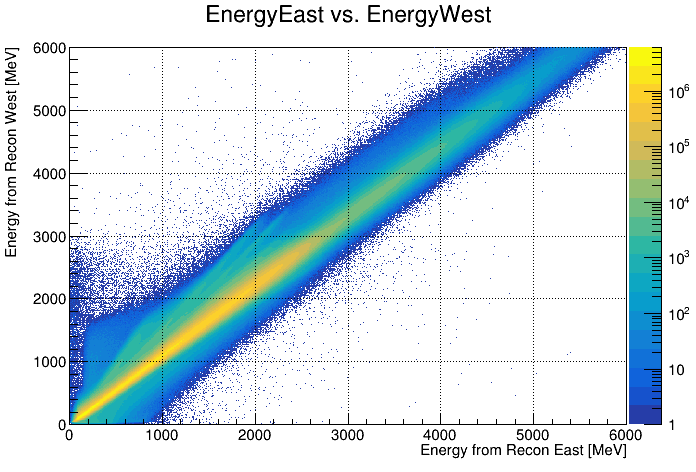

In [10]:
c = r.TCanvas()
evwEnergyEvW = fhist.Get("farline").Get("evwEnergyEvW").Clone()
evwEnergyEvW.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

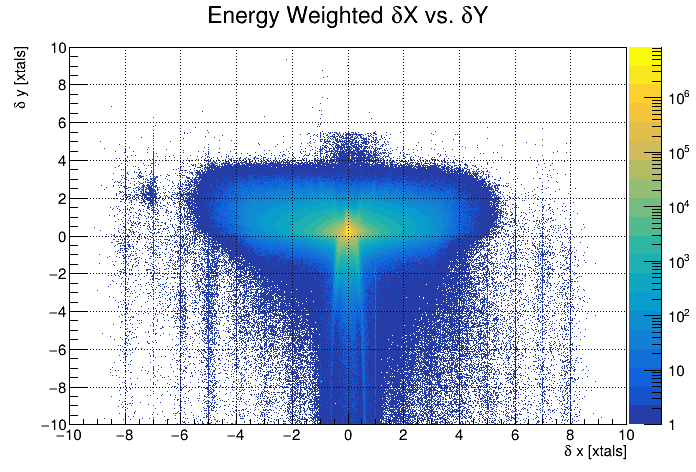

In [11]:
c = r.TCanvas()
evwDeltaXDeltaY = fhist.Get("farline").Get("evwDeltaXDeltaY").Clone()
evwDeltaXDeltaY.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

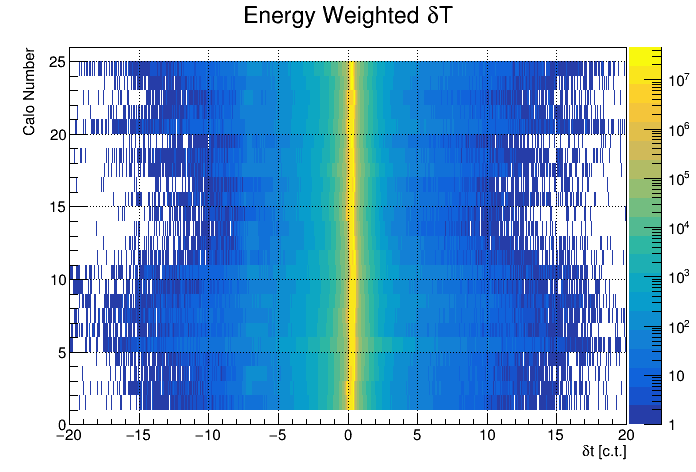

In [12]:
c = r.TCanvas()
evwDeltaTCalo = fhist.Get("farline").Get("evwDeltaTCalo").Clone()
evwDeltaTCalo.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

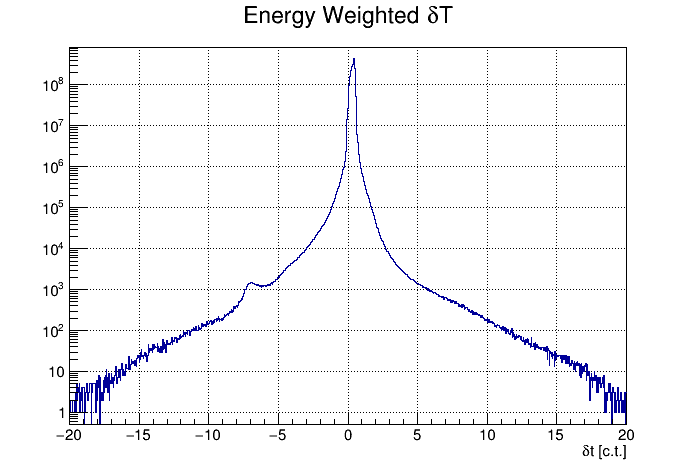

In [13]:
c = r.TCanvas()
evwDeltaTCalo.ProjectionX().Draw("colz")
c.SetLogy()
c.SetGrid()
c.Draw()

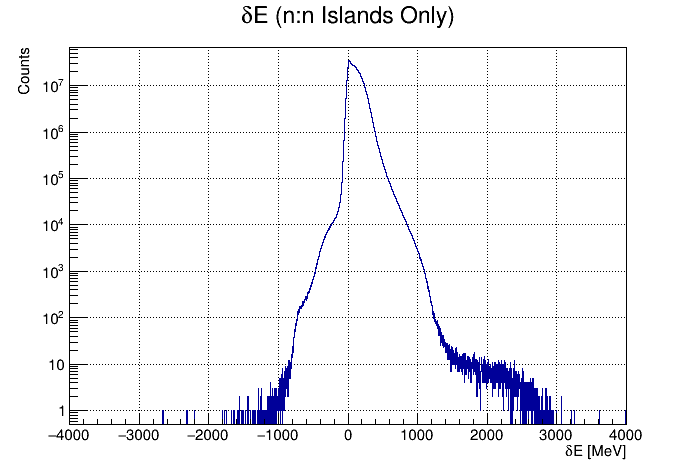

In [14]:
c = r.TCanvas()
evwDeltaE = fhist.Get("farline").Get("evwDeltaE").Clone()
evwDeltaE.Draw("colz")
c.SetLogy()
c.SetGrid()
c.Draw()

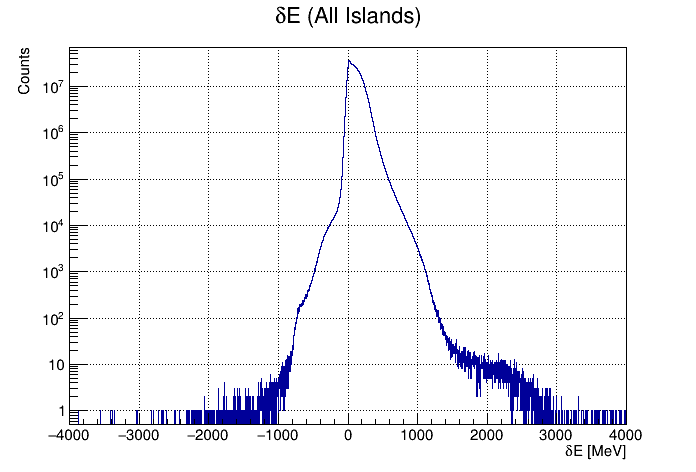

In [15]:
c = r.TCanvas()
evwDeltaEAll = fhist.Get("farline").Get("evwDeltaEAll").Clone()
evwDeltaEAll.Draw("colz")
c.SetLogy()
c.SetGrid()
c.Draw()

In [27]:
evwDeltaEAllScaled = evwDeltaEAll.Clone("evwDeltaEAllScaled")
evwDeltaEAllScaled.Scale(1/(evwDeltaEAllScaled.GetEntries()))
evwDeltaEScaled = evwDeltaE.Clone("evwDeltaEScaled")
evwDeltaEScaled.Scale(1/(evwDeltaEScaled.GetEntries()))

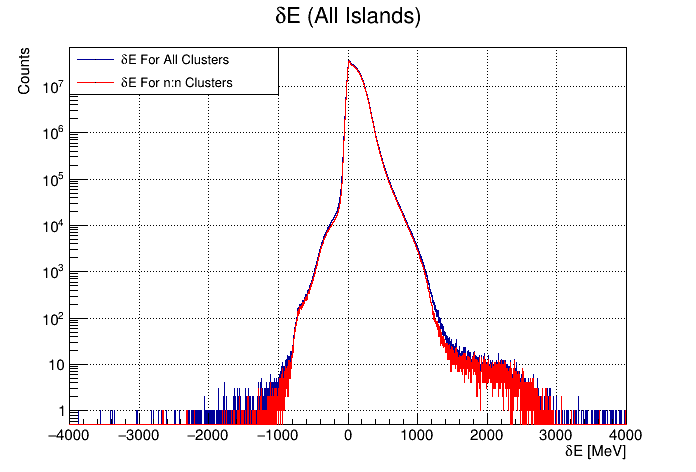

In [28]:
c = r.TCanvas()
evwDeltaEAll.Draw("")
evwDeltaEAll.GetXaxis().SetRangeUser(-4000,4000)
evwDeltaE.SetLineColor(2)
evwDeltaE.Draw("same")
c.SetLogy()
c.SetGrid()

leg = r.TLegend(0.1,0.8,0.4,0.9)
leg.AddEntry(evwDeltaEAll, "#deltaE For All Clusters")
leg.AddEntry(evwDeltaE, "#deltaE For n:n Clusters")
leg.Draw()

c.Draw()

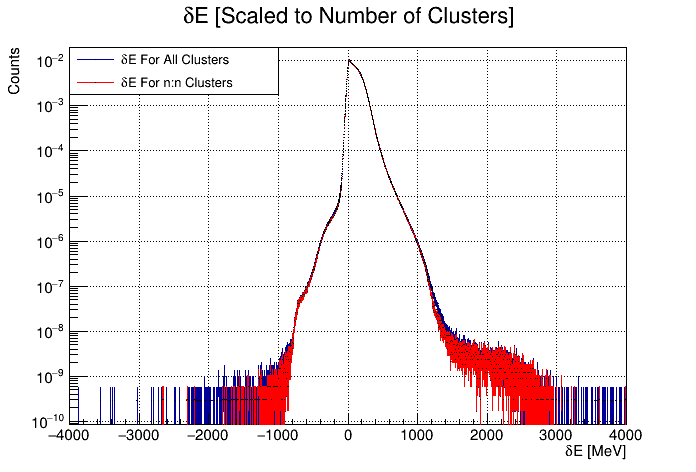

In [32]:
c = r.TCanvas()
evwDeltaEAllScaled.Draw("")
evwDeltaEAllScaled.GetXaxis().SetRangeUser(-4000,4000)
evwDeltaEAllScaled.SetTitle("#deltaE [Scaled to Number of Clusters]")
evwDeltaEScaled.SetLineColor(2)
evwDeltaEScaled.Draw("same")
c.SetLogy()
c.SetGrid()

leg = r.TLegend(0.1,0.8,0.4,0.9)
leg.AddEntry(evwDeltaEAllScaled, "#deltaE For All Clusters")
leg.AddEntry(evwDeltaEScaled, "#deltaE For n:n Clusters")
leg.Draw()

c.Draw()

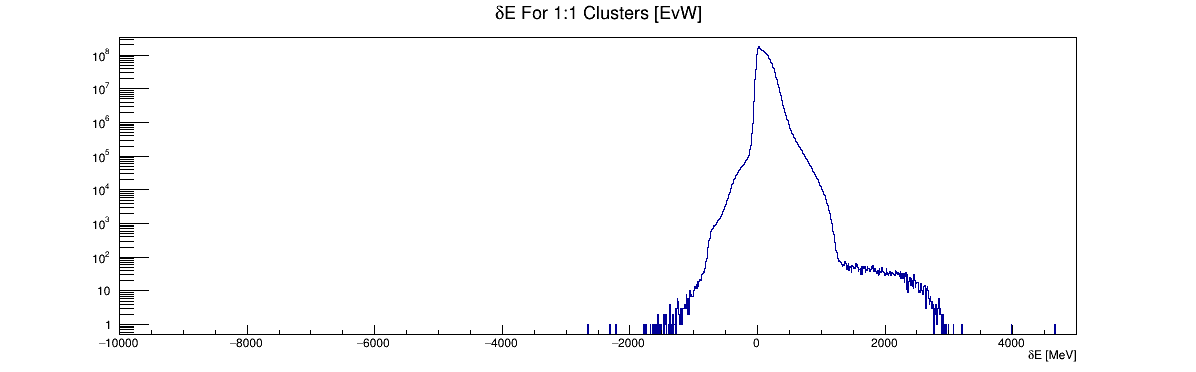

In [39]:
f2 = r.TFile("./data/results_histOnly_60hUnblinding_goldenruns.root")
c2 = r.TCanvas("c2","c2",1200,400)
evwDeltaE11 = f2.Get("farline").Get("evwDeltaXDeltaE").Clone().ProjectionY()
evwDeltaE11.SetTitle("#deltaE For 1:1 Clusters [EvW]; #deltaE [MeV]")
evwDeltaE11.Draw()
c2.SetLogy()
c2.Draw()

In [57]:
evwDeltaE11Scaled = evwDeltaE11.Clone("evwDeltaE11Scaled")
evwDeltaE11Scaled.Scale(1/(evwDeltaE11Scaled.GetEntries()))
evwDeltaE11Scaled.SetLineColor(6)
evwDeltaE11Scaled.SetMarkerColor(6)

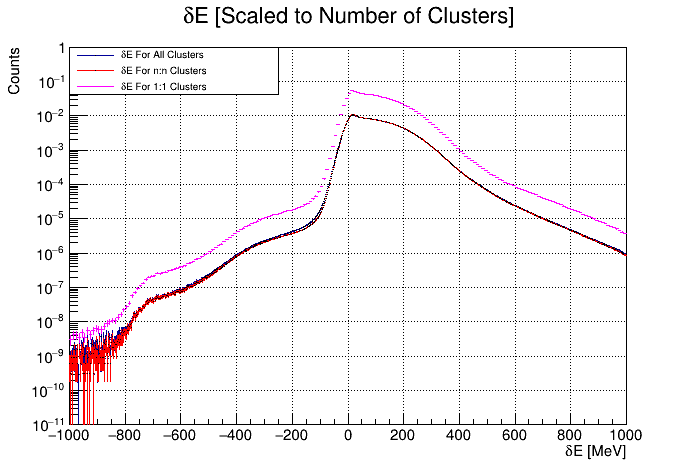

In [58]:
c = r.TCanvas()
evwDeltaEAllScaled.Draw("")
evwDeltaEAllScaled.GetXaxis().SetRangeUser(-1000,1000)
evwDeltaEAllScaled.GetYaxis().SetRangeUser(10**(-11),1)
evwDeltaEAllScaled.SetTitle("#deltaE [Scaled to Number of Clusters]")
evwDeltaEScaled.SetLineColor(2)
evwDeltaEScaled.Draw("same")
evwDeltaE11Scaled.Draw("SAME")
c.SetLogy()
c.SetGrid()

leg = r.TLegend(0.1,0.8,0.4,0.9)
leg.AddEntry(evwDeltaEAllScaled, "#deltaE For All Clusters")
leg.AddEntry(evwDeltaEScaled, "#deltaE For n:n Clusters")
leg.AddEntry(evwDeltaE11Scaled, "#deltaE For 1:1 Clusters")
leg.Draw()

c.Draw()

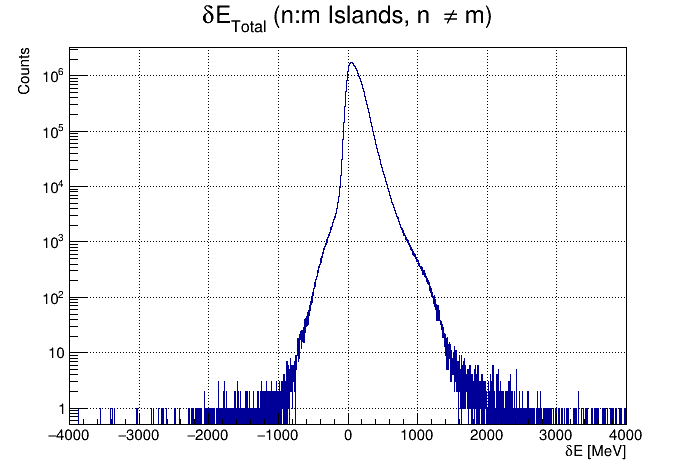

In [59]:
c = r.TCanvas()
evwDeltaENon = evwDeltaEAll.Clone("evwDeltaENon")
evwDeltaENon.SetTitle("#deltaE_{Total} (n:m Islands, n #neq m)")
evwDeltaENon.Add(evwDeltaE, -1)
evwDeltaENon.Draw("")
c.SetLogy()
c.SetGrid()
c.Draw()

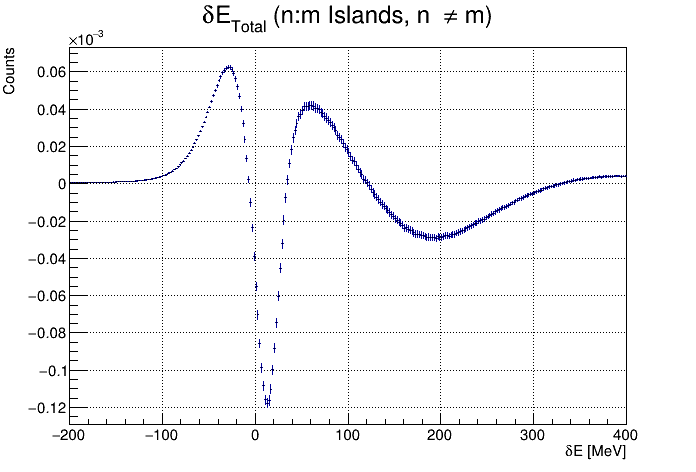

In [38]:
c = r.TCanvas()
evwDeltaENonScaled = evwDeltaEAllScaled.Clone("evwDeltaENonScaled")
evwDeltaENonScaled.GetXaxis().SetRangeUser(-200,400)
evwDeltaENonScaled.SetTitle("#deltaE_{Total} (n:m Islands, n #neq m)")
evwDeltaENonScaled.Add(evwDeltaEScaled, -1)
evwDeltaENonScaled.Draw("")
#c.SetLogy()
c.SetGrid()
c.Draw()